In [2]:
!python3 --version

Python 3.9.10


In [3]:
!pip install kaggle

In [4]:
!pwd

/root/playerContactDetection/notebooks


In [3]:
!kaggle competitions download -c nfl-player-contact-detection -p data/raw/

100%|█████████████████████████████████████▉| 3.83G/3.84G [01:04<00:00, 54.6MB/s]
100%|██████████████████████████████████████| 3.84G/3.84G [01:07<00:00, 61.3MB/s]


In [4]:
!unzip data/raw/nfl-player-contact-detection.zip -d data/raw/

Archive:  data/raw/nfl-player-contact-detection.zip
  inflating: data/raw/sample_submission.csv  
  inflating: data/raw/test/58168_003392_All29.mp4  
  inflating: data/raw/test/58168_003392_Endzone.mp4  
  inflating: data/raw/test/58168_003392_Sideline.mp4  
  inflating: data/raw/test/58172_003247_All29.mp4  
  inflating: data/raw/test/58172_003247_Endzone.mp4  
  inflating: data/raw/test/58172_003247_Sideline.mp4  
  inflating: data/raw/test_baseline_helmets.csv  
  inflating: data/raw/test_player_tracking.csv  
  inflating: data/raw/test_video_metadata.csv  
  inflating: data/raw/train/58168_003392_All29.mp4  
  inflating: data/raw/train/58168_003392_Endzone.mp4  
  inflating: data/raw/train/58168_003392_Sideline.mp4  
  inflating: data/raw/train/58172_003247_All29.mp4  
  inflating: data/raw/train/58172_003247_Endzone.mp4  
  inflating: data/raw/train/58172_003247_Sideline.mp4  
  inflating: data/raw/train/58173_003606_All29.mp4  
  inflating: data/raw/train/58173_003606_Endzone.mp4

Number of frames: 711.0
Frame width: 1280.0
Frame height: 720.0


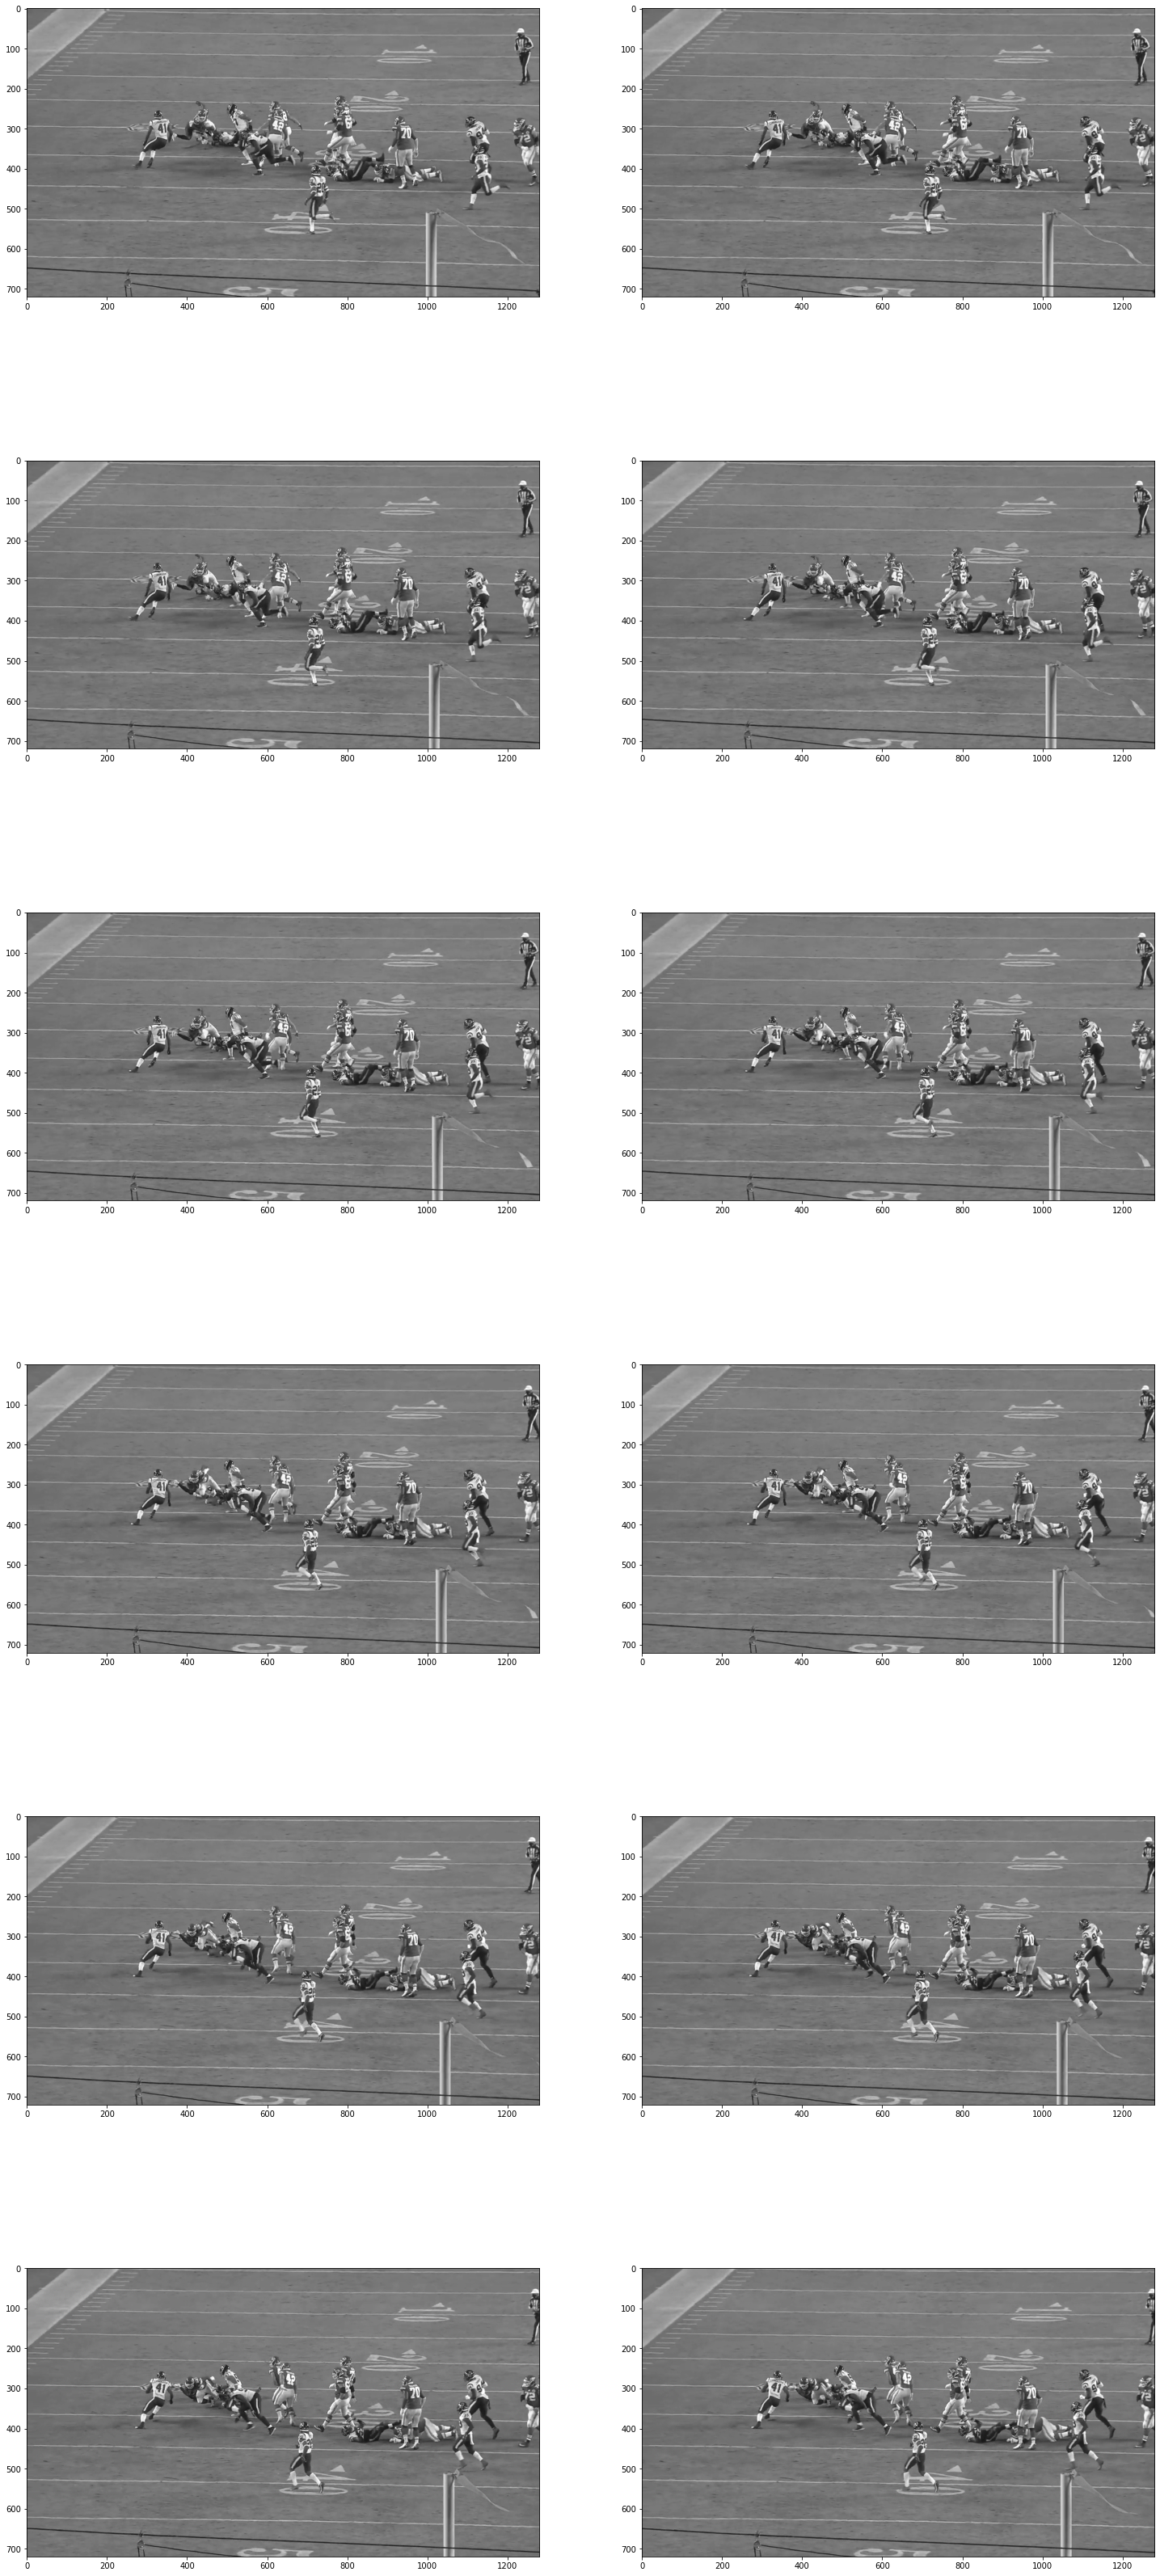

In [24]:
import cv2
import matplotlib.pyplot as plt

# Opening the video file using cv2.VideoCapture
video_capture = cv2.VideoCapture(f"data/raw/train/{merged_data['game_play'][1]}_{merged_data['view'][2]}.mp4")

# Checking if the video was opened successfully
# by calling the .isOpened() method on the VideoCapture object
if not video_capture.isOpened():
    print('Error opening video file')

# Basic information about the video
# such as the number of frames and the frame width and height
num_frames = video_capture.get(cv2.CAP_PROP_FRAME_COUNT)
frame_width = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(f'Number of frames: {num_frames}')
print(f'Frame width: {frame_width}')
print(f'Frame height: {frame_height}')

frames = []  # Storing the frames in a list so that we can display them later
while True:
    # Using the .read() method of the VideoCapture object
    # to read the next frame of the video
    ret, frame = video_capture.read()
    
    # If the .read() method returns False, it means we have reached the end of the video
    if not ret:
        break
    
    # Processing the frame:
    # Converting the frame to grayscale using cv2.cvtColor
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Let's store the processed frame in the list
    frames.append(frame)

# After processing all the frames, let's display them using matplotlib
# using subplots to display multiple frames in a single figure
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(25, 60))
axs = axs.flatten()
for ax, frame in zip(axs, frames[500:]):
    ax.imshow(frame, cmap='gray')
plt.show()

# Release the VideoCapture object to free up memory
video_capture.release()

In [6]:
import pandas as pd
train_video_metadata_df = pd.read_csv("data/raw/train_video_metadata.csv")

In [7]:
train_video_metadata_df.head()

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58172_003247,58172,3247,Endzone,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
3,58172_003247,58172,3247,Sideline,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
4,58173_003606,58173,3606,Endzone,2020-09-13T19:45:07.527Z,2020-09-13T19:45:26.438Z,2020-09-13T19:45:12.527Z


In [8]:
train_video_metadata_df.shape

(480, 7)

In [9]:
train_label_df = pd.read_csv("data/raw/train_labels.csv")

In [10]:
train_label_df.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [11]:
train_label_df.shape

(4721618, 7)

In [16]:
merged_data = pd.merge(train_label_df, train_video_metadata_df, on=["game_play"])

In [17]:
merged_data.shape

(9443236, 13)

In [ ]:
train_label_df.query('game_play == "58168_003392"')

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0
...,...,...,...,...,...,...,...
17705,58168_003392_69_45695_G,58168_003392,2020-09-11T03:01:55.000Z,69,45695,G,0
17706,58168_003392_69_42565_G,58168_003392,2020-09-11T03:01:55.000Z,69,42565,G,0
17707,58168_003392_69_46445_G,58168_003392,2020-09-11T03:01:55.000Z,69,46445,G,0
17708,58168_003392_69_40011_G,58168_003392,2020-09-11T03:01:55.000Z,69,40011,G,0


In [ ]:
merged_data.query('game_play == "58168_003392"')

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
3,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
4,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35415,58168_003392_69_46445_G,58168_003392,2020-09-11T03:01:55.000Z,69,46445,G,0,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
35416,58168_003392_69_40011_G,58168_003392,2020-09-11T03:01:55.000Z,69,40011,G,0,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
35417,58168_003392_69_40011_G,58168_003392,2020-09-11T03:01:55.000Z,69,40011,G,0,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
35418,58168_003392_69_46522_G,58168_003392,2020-09-11T03:01:55.000Z,69,46522,G,0,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z


In [ ]:
for i in train_labels['game_play']:
    train_video_metadata_df[i]